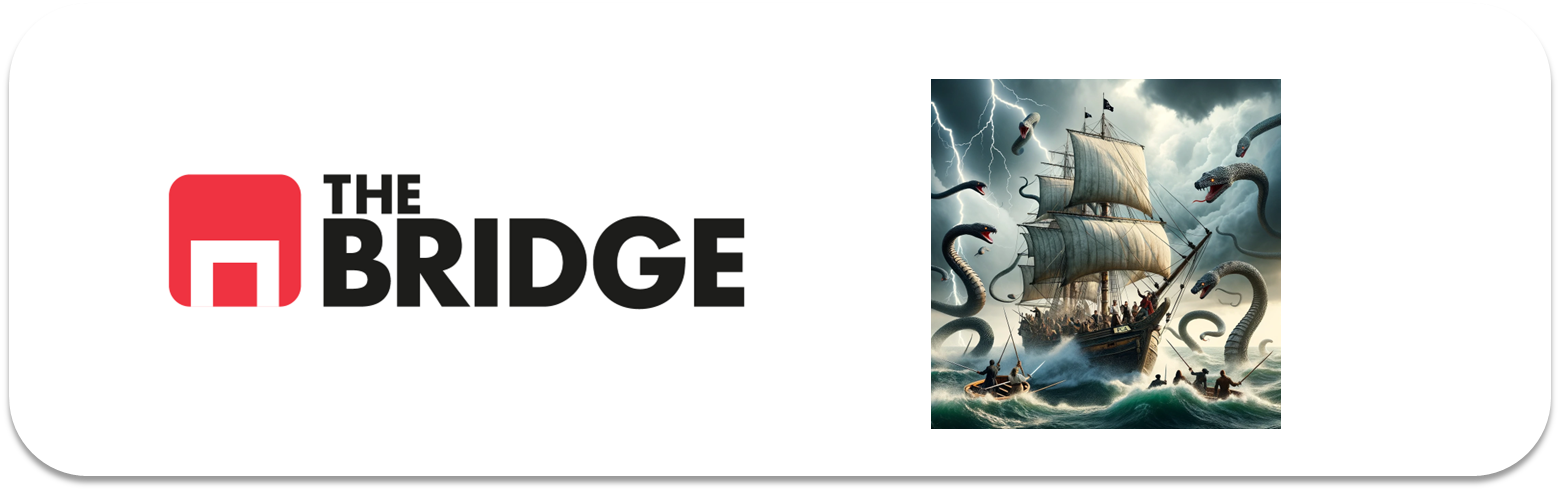

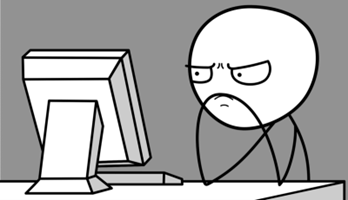

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [69]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [70]:
df = pd.read_csv("./data/breastcancer-winsconsin.csv")

In [71]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [73]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) 
    # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [74]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
id,569,100.0,int64,Numerica continua
diagnosis,2,0.351494,object,Binaria
radius_mean,456,80.140598,float64,Numerica continua
texture_mean,479,84.182777,float64,Numerica continua
perimeter_mean,522,91.739895,float64,Numerica continua
area_mean,539,94.727592,float64,Numerica continua
smoothness_mean,474,83.304042,float64,Numerica continua
compactness_mean,537,94.376098,float64,Numerica continua
concavity_mean,537,94.376098,float64,Numerica continua
concave points_mean,542,95.254833,float64,Numerica continua


### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [75]:
df.drop(['id', 'Unnamed: 32'], axis = "columns", inplace=True)


In [76]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [77]:

df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder

# Codificar la columna 'diagnosis' M=1 ; B=0
label_encoder = LabelEncoder()
df['diagnosis_bin'] = label_encoder.fit_transform(df['diagnosis'])

In [79]:
df.diagnosis_bin.value_counts()

diagnosis_bin
0    357
1    212
Name: count, dtype: int64

In [110]:
df.drop(['diagnosis'], axis = "columns", inplace=True)

KeyError: "['diagnosis'] not found in axis"

In [ ]:
target='diagnosis_bin'

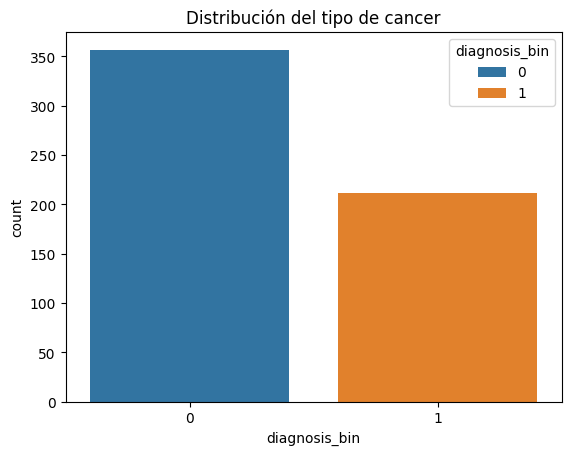

In [ ]:
sns.countplot(x='diagnosis_bin', data=df, hue= target)
plt.title("Distribución del tipo de cancer")
plt.show()

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [112]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [113]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [115]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_bin'],
      dtype='object')

In [116]:
col_num = df.describe().T.index.tolist()
col_num

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis_bin']

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

In [117]:
corr = train_set.corr(numeric_only=True)
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_bin
radius_mean,1.000000,0.306881,0.997850,0.986609,0.173051,0.477986,0.647311,0.812377,0.150386,-0.335575,...,0.287590,0.963536,0.941849,0.121926,0.386325,0.496800,0.722309,0.168092,-0.024337,0.718073
texture_mean,0.306881,1.000000,0.313124,0.300314,0.009475,0.229954,0.282160,0.286231,0.108045,-0.079010,...,0.909718,0.340226,0.318693,0.093301,0.274007,0.282771,0.299703,0.122984,0.102868,0.416213
perimeter_mean,0.997850,0.313124,1.000000,0.985985,0.210092,0.529721,0.688251,0.842081,0.185885,-0.286307,...,0.294406,0.969674,0.943283,0.153170,0.430426,0.535560,0.751413,0.191948,0.020731,0.731859
area_mean,0.986609,0.300314,0.985985,1.000000,0.180709,0.471296,0.659793,0.814273,0.152679,-0.305321,...,0.274861,0.955701,0.959723,0.127772,0.364068,0.484949,0.700435,0.144752,-0.026035,0.695171
smoothness_mean,0.173051,0.009475,0.210092,0.180709,1.000000,0.672342,0.536920,0.564538,0.539744,0.577171,...,0.075452,0.251658,0.219265,0.808290,0.492527,0.458749,0.526387,0.385244,0.521392,0.375137
compactness_mean,0.477986,0.229954,0.529721,0.471296,0.672342,1.000000,0.877467,0.825932,0.620483,0.569638,...,0.247127,0.573716,0.493183,0.572021,0.867774,0.813566,0.817321,0.506480,0.691960,0.590554
concavity_mean,0.647311,0.282160,0.688251,0.659793,0.536920,0.877467,1.000000,0.914671,0.519030,0.349280,...,0.289986,0.710338,0.659259,0.457626,0.751516,0.884079,0.855087,0.416326,0.519451,0.683262
concave points_mean,0.812377,0.286231,0.842081,0.814273,0.564538,0.825932,0.914671,1.000000,0.476735,0.160184,...,0.300338,0.855666,0.811102,0.467630,0.664415,0.748041,0.910680,0.391108,0.363804,0.778115
symmetry_mean,0.150386,0.108045,0.185885,0.152679,0.539744,0.620483,0.519030,0.476735,1.000000,0.482673,...,0.138865,0.229285,0.183576,0.416854,0.508593,0.461163,0.464676,0.699251,0.476875,0.348123
fractal_dimension_mean,-0.335575,-0.079010,-0.286307,-0.305321,0.577171,0.569638,0.349280,0.160184,0.482673,1.000000,...,-0.053244,-0.221453,-0.246204,0.495491,0.467774,0.364380,0.186256,0.317793,0.784537,-0.014308


In [118]:
np.abs(corr[target]).sort_values(ascending = False)

diagnosis_bin              1.000000
concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
smoothness_se              0.058123
fractal_dimension_se       0

In [124]:
serie_corr = np.abs(corr[target]).sort_values(ascending = False)

In [132]:
criterio = 0.25
col_numeric = serie_corr[serie_corr > criterio].index.to_list()
col_numeric.remove(target)

In [129]:
#col_numeric = np.abs(corr[target]).sort_values(ascending = False).index.to_list()

In [133]:
col_numeric

['concave points_worst',
 'concave points_mean',
 'perimeter_worst',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'symmetry_worst',
 'smoothness_worst',
 'texture_mean',
 'concave points_se',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_worst',
 'compactness_se']

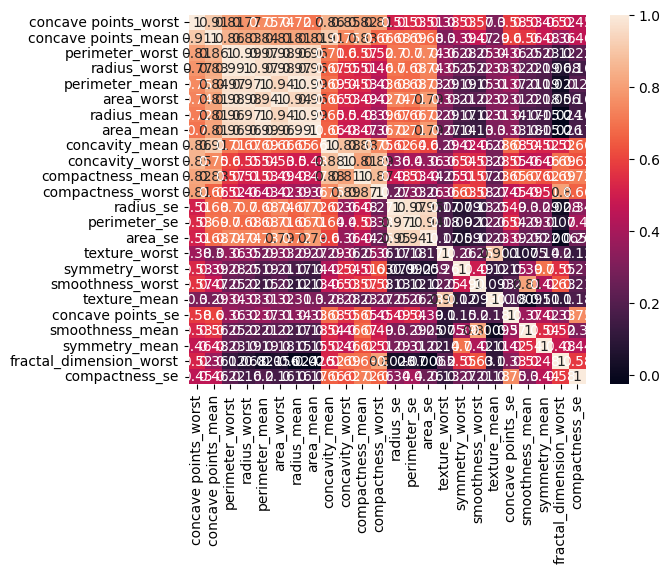

In [134]:
sns.heatmap(train_set[col_numeric].corr(),annot=True);
plt.show();

In [141]:
#aplicando colinealidad
criterio_col = 0.65
excluidas = []
for col in col_numeric:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in col_numeric:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con concave points_worst
Comprobando con radius_mean
No estaba ya en la lista original, no hago nada
Comprobando con texture_mean
No estaba ya en la lista original, no hago nada
Comprobando con perimeter_mean
No estaba ya en la lista original, no hago nada
Comprobando con area_mean
No estaba ya en la lista original, no hago nada
Comprobando con smoothness_mean
No estaba ya en la lista original, no hago nada
Comprobando con compactness_mean
No estaba ya en la lista original, no hago nada
Comprobando con concavity_mean
No estaba ya en la lista original, no hago nada
Comprobando con concave points_mean
No estaba ya en la lista original, no hago nada
Comprobando con symmetry_mean
Conmigo no tiene problema, dejo a symmetry_mean tranquila
Comprobando con fractal_dimension_mean
No estaba ya en la lista original, no hago nada
Comprobando con radius_se
Conmigo no tiene problema, dejo a radius_se tranquila
Comprobando con texture_se
No estaba ya en la lista origin

In [142]:
excluidas

['symmetry_mean']

In [143]:
for excluida in excluidas:
    col_numeric.remove(excluida)
col_numeric

['concave points_worst',
 'radius_se',
 'texture_worst',
 'symmetry_worst',
 'smoothness_worst',
 'concave points_se',
 'fractal_dimension_worst']

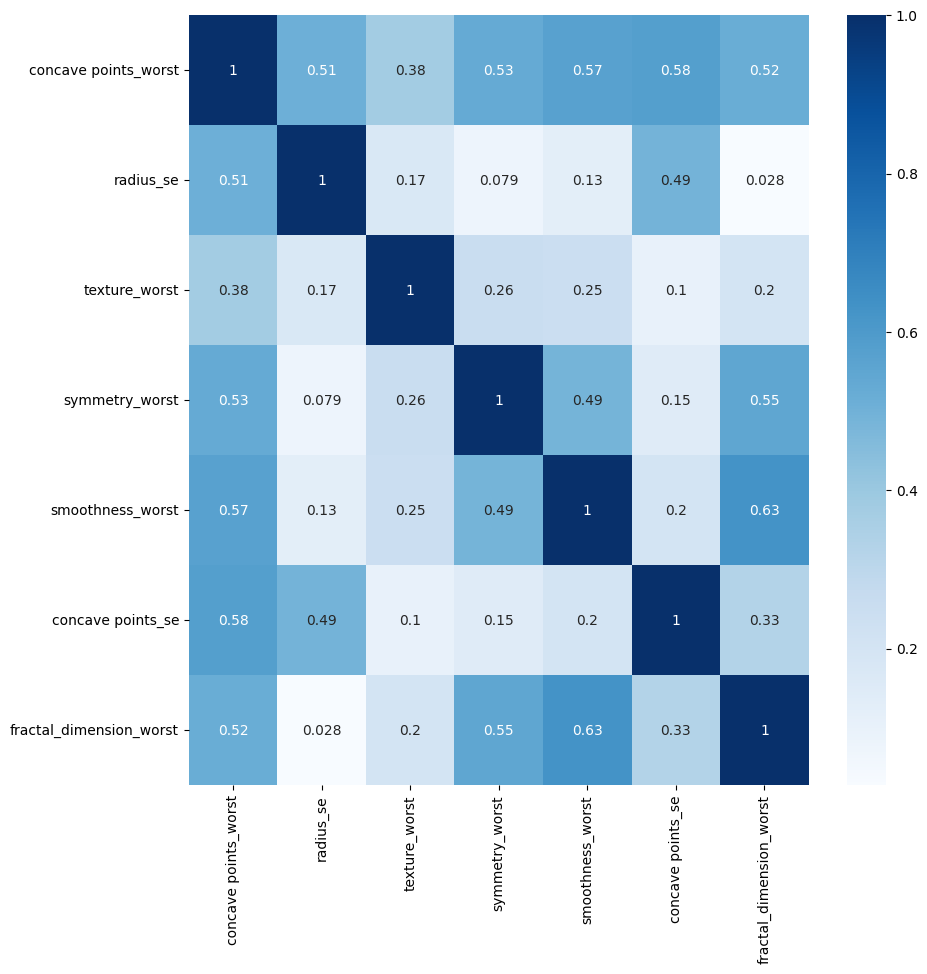

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(train_set[col_numeric].corr(), annot = True, cmap = "Blues");



### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.